In [24]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

In [25]:
df = pd.read_csv('../csvFiles/train.csv')
df.head()

,Roll no,test preparation,gender,parental level of education,lunch,Section,practical score,viva score,exam score
0,EXA000001,none,male,some college,standard,Section A,70,73,70
1,EXA000002,none,male,master's degree,free/reduced,Section C,55,54,52
2,EXA000003,none,male,master's degree,free/reduced,Section E,56,46,43
3,EXA000004,none,female,some college,free/reduced,Section C,35,47,41
4,EXA000005,none,female,high school,standard,Section C,87,92,81


In [26]:
df1 = df.drop(['Roll no','Section'],axis='columns')
df1.head()

,test preparation,gender,parental level of education,lunch,practical score,viva score,exam score
0,none,male,some college,standard,70,73,70
1,none,male,master's degree,free/reduced,55,54,52
2,none,male,master's degree,free/reduced,56,46,43
3,none,female,some college,free/reduced,35,47,41
4,none,female,high school,standard,87,92,81


In [27]:
df1.shape

(31999, 7)

In [28]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31999 entries, 0 to 31998
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   test preparation             31999 non-null  object
 1   gender                       31999 non-null  object
 2   parental level of education  31999 non-null  object
 3   lunch                        31999 non-null  object
 4   practical score              31999 non-null  int64 
 5   viva score                   31999 non-null  int64 
 6   exam score                   31999 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 1.7+ MB


In [29]:
df1.describe()

,practical score,viva score,exam score
count,31999.000000,31999.000000,31999.000000
mean,67.839870,70.375168,69.139598
std,15.229898,14.092764,15.009974
min,15.000000,25.000000,15.000000
25%,58.000000,61.000000,59.000000
50%,68.000000,70.000000,70.000000
75%,80.000000,80.000000,80.000000
max,100.000000,100.000000,100.000000


In [30]:
df1['lunch'].isnull().sum()

0

In [31]:
df1.columns

Index(['test preparation ', 'gender', 'parental level of education', 'lunch',
       'practical score', 'viva score', 'exam score'],
      dtype='object')

In [32]:
df1['parental level of education'].unique()

array(['some college', "master's degree", 'high school',
       "associate's degree", 'some high school', "bachelor's degree"],
      dtype=object)

In [33]:
df2_encoded = pd.get_dummies(df1,columns=['parental level of education', 'test preparation ', 'gender', 'lunch'])
df2_encoded.head()

,practical score,viva score,exam score,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,test preparation _completed,test preparation _none,gender_female,gender_male,lunch_free/reduced,lunch_standard
0,70,73,70,False,False,False,False,True,False,False,True,False,True,False,True
1,55,54,52,False,False,False,True,False,False,False,True,False,True,True,False
2,56,46,43,False,False,False,True,False,False,False,True,False,True,True,False
3,35,47,41,False,False,False,False,True,False,False,True,True,False,True,False
4,87,92,81,False,False,True,False,False,False,False,True,True,False,False,True


In [34]:
def remove_prefix(column_name):
    if '_' in column_name:
        return column_name.split('_', 1)[1]  # Split on the first underscore and take the second part
    else:
        return column_name

In [35]:
df2_encoded.columns = [remove_prefix(col) for col in df2_encoded.columns]
df2_encoded.head()

,practical score,viva score,exam score,associate's degree,bachelor's degree,high school,master's degree,some college,some high school,completed,none,female,male,free/reduced,standard
0,70,73,70,False,False,False,False,True,False,False,True,False,True,False,True
1,55,54,52,False,False,False,True,False,False,False,True,False,True,True,False
2,56,46,43,False,False,False,True,False,False,False,True,False,True,True,False
3,35,47,41,False,False,False,False,True,False,False,True,True,False,True,False
4,87,92,81,False,False,True,False,False,False,False,True,True,False,False,True


In [36]:
df2_encoded.shape

(31999, 15)

In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
columns_to_standardize = ['practical score', 'viva score']

df2_encoded[columns_to_standardize] = scaler.fit_transform(df2_encoded[columns_to_standardize])
df2_encoded.head()


,practical score,viva score,exam score,associate's degree,bachelor's degree,high school,master's degree,some college,some high school,completed,none,female,male,free/reduced,standard
0,0.141837,0.186257,70,False,False,False,False,True,False,False,True,False,True,False,True
1,-0.843083,-1.161974,52,False,False,False,True,False,False,False,True,False,True,True,False
2,-0.777422,-1.729650,43,False,False,False,True,False,False,False,True,False,True,True,False
3,-2.156310,-1.658690,41,False,False,False,False,True,False,False,True,True,False,True,False
4,1.258080,1.534487,81,False,False,True,False,False,False,False,True,True,False,False,True


In [38]:
X = df2_encoded.drop('exam score',axis='columns')
y = df2_encoded['exam score']


In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)


In [40]:
from sklearn.linear_model import LinearRegression
lenR = LinearRegression()
lenR.fit(X_train,y_train)
lenR.score(X_test,y_test)

0.0017721271571938813

In [41]:
df['Roll no'].duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
31994    False
31995    False
31996    False
31997    False
31998    False
Name: Roll no, Length: 31999, dtype: bool

In [62]:
from sklearn.linear_model import LinearRegression
lenR = LinearRegression()
lenR.fit(X_train,y_train)
lenR.score(X_test,y_test)

0.00137602731883113

In [63]:
from sklearn.ensemble import GradientBoostingRegressor

GradBoo = GradientBoostingRegressor(n_estimators=100)
GradBoo.fit(X_train, y_train)
GradBoo.predict(X_test)

array([69.18344886, 69.63892666, 68.3504982 , ..., 67.90194097,
       67.47666298, 70.26079526])

In [64]:
GradBoo.score(X_test,y_test)

0.0014466651093069105

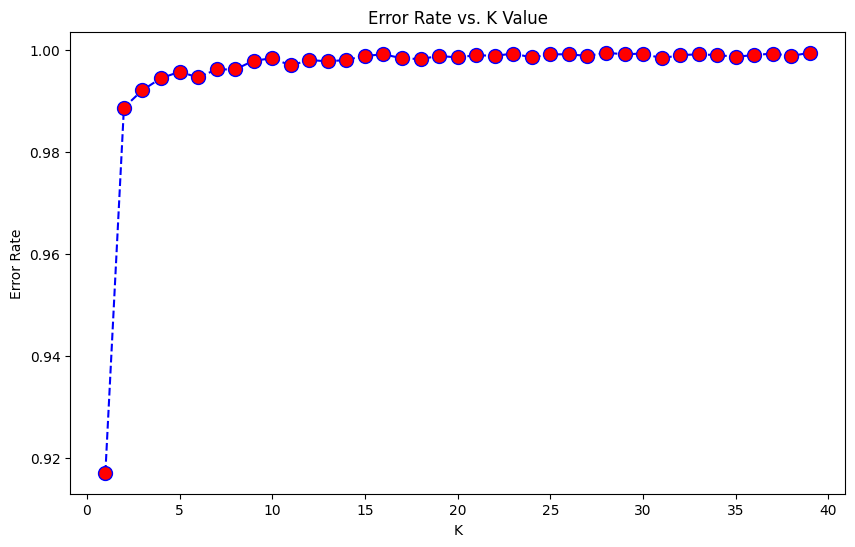

In [42]:
error_rate = []

# Will take some time
for i in range(1, 40):

	knn = KNeighborsRegressor(n_neighbors=i)
	knn.fit(X_train, y_train)
	pred_i = knn.predict(X_test)
	error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10, 6))
plt.plot(range(1, 40), error_rate, color='blue',
		linestyle='dashed', marker='o',
		markerfacecolor='red', markersize=10)

plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

In [23]:
from sklearn.neighbors import KNeighborsRegressor

knn_model = KNeighborsRegressor(n_neighbors=1)
knn_model.fit(X_train, y_train)
(knn_model.score(X_test,y_test))*-1

0.9105482280711867

In [44]:
X_test

,practical score,viva score,associate's degree,bachelor's degree,high school,master's degree,some college,some high school,completed,none,female,male,free/reduced,standard
3874,-0.514776,-0.310460,False,False,False,False,False,True,False,True,True,False,False,True
4034,-0.383454,0.612014,False,False,True,False,False,False,True,False,False,True,False,True
16340,-0.646099,-0.807176,True,False,False,False,False,False,False,True,False,True,False,True
28191,0.141837,0.328176,False,False,False,True,False,False,True,False,True,False,True,False
17581,0.404482,-1.800609,True,False,False,False,False,False,False,True,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4814,0.995435,-0.878136,False,False,False,False,False,True,True,False,True,False,True,False
24361,1.061096,0.541054,False,False,True,False,False,False,False,True,False,True,False,True
4416,-1.237051,-0.239500,False,False,False,False,False,True,False,True,False,True,False,True
13707,0.864112,2.102163,False,False,False,False,True,False,False,True,False,True,False,True


In [45]:
test_df = pd.read_csv('../csvFiles/test.csv')
test_df.head()

,Roll no,test preparation,gender,parental level of education,lunch,Section,practical score,viva score
0,EXA32000,none,male,associate's degree,standard,Section C,74,89
1,EXA32001,completed,male,some high school,standard,Section E,66,75
2,EXA32002,none,male,some high school,standard,Section C,52,55
3,EXA32003,completed,male,some high school,standard,Section D,69,85
4,EXA32004,none,female,bachelor's degree,standard,Section E,46,62


In [46]:
test_df1 = test_df.drop(['Roll no','Section'],axis='columns')
test_df1.head()

,test preparation,gender,parental level of education,lunch,practical score,viva score
0,none,male,associate's degree,standard,74,89
1,completed,male,some high school,standard,66,75
2,none,male,some high school,standard,52,55
3,completed,male,some high school,standard,69,85
4,none,female,bachelor's degree,standard,46,62


In [47]:
test_df2_encoded = pd.get_dummies(test_df1,columns=['parental level of education', 'test preparation ', 'gender', 'lunch'])
test_df2_encoded.head()

,practical score,viva score,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,test preparation _completed,test preparation _none,gender_female,gender_male,lunch_free/reduced,lunch_standard
0,74,89,True,False,False,False,False,False,False,True,False,True,False,True
1,66,75,False,False,False,False,False,True,True,False,False,True,False,True
2,52,55,False,False,False,False,False,True,False,True,False,True,False,True
3,69,85,False,False,False,False,False,True,True,False,False,True,False,True
4,46,62,False,True,False,False,False,False,False,True,True,False,False,True


In [48]:
test_df2_encoded.columns = [remove_prefix(col) for col in test_df2_encoded.columns]
test_df2_encoded.head()

,practical score,viva score,associate's degree,bachelor's degree,high school,master's degree,some college,some high school,completed,none,female,male,free/reduced,standard
0,74,89,True,False,False,False,False,False,False,True,False,True,False,True
1,66,75,False,False,False,False,False,True,True,False,False,True,False,True
2,52,55,False,False,False,False,False,True,False,True,False,True,False,True
3,69,85,False,False,False,False,False,True,True,False,False,True,False,True
4,46,62,False,True,False,False,False,False,False,True,True,False,False,True


In [49]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
columns_to_standardize = ['practical score', 'viva score']

test_df2_encoded[columns_to_standardize] = scaler.fit_transform(test_df2_encoded[columns_to_standardize])
test_df2_encoded.head()


,practical score,viva score,associate's degree,bachelor's degree,high school,master's degree,some college,some high school,completed,none,female,male,free/reduced,standard
0,0.570117,1.376107,True,False,False,False,False,False,False,True,False,True,False,True
1,0.052417,0.415234,False,False,False,False,False,True,True,False,False,True,False,True
2,-0.853558,-0.957441,False,False,False,False,False,True,False,True,False,True,False,True
3,0.246555,1.101572,False,False,False,False,False,True,True,False,False,True,False,True
4,-1.241833,-0.477005,False,True,False,False,False,False,False,True,True,False,False,True


In [51]:
val = knn_model.predict(test_df2_encoded)

In [52]:
val

array([ 68.,  47.,  70.,  54.,  63.,  60.,  74.,  58.,  70.,  85.,  71.,
        51.,  70.,  97.,  71.,  70.,  64.,  72.,  41.,  91.,  93.,  38.,
        72.,  55.,  68.,  77.,  81.,  74.,  62.,  64.,  43.,  91.,  70.,
        89.,  84.,  59.,  64.,  48.,  78.,  76.,  76.,  76.,  37.,  78.,
        74.,  63.,  52.,  76., 100.,  72.,  70.,  78.,  87.,  53.,  83.,
        80.,  53.,  83.,  61.,  66.,  49.,  87., 100.,  56.,  69.,  89.,
        46.,  51.,  65.,  78.,  64.,  66.,  72.,  96.,  64.,  42.,  88.,
        81.,  57.,  83.,  90.,  61.,  90.,  67.,  76.,  59.,  79.,  96.,
        59.,  87.,  68.,  76.,  67.,  59.,  52.,  72.,  82.,  96.,  81.,
        43.])